## Brinda Temkar
## Stock Market Prediction And Forecasting Using Stacked LSTM
### Beginner Level: Task 2

In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [79]:
dataset = pd.read_csv('StockMarketData.csv')
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [80]:
#Sort data by date
dataset['Date'] = pd.to_datetime(dataset['Date'])
print(type(dataset.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [81]:
df = dataset.sort_values(by = 'Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [82]:
dataset.shape

(2035, 8)

In [83]:
df.reset_index(inplace = True)

In [84]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


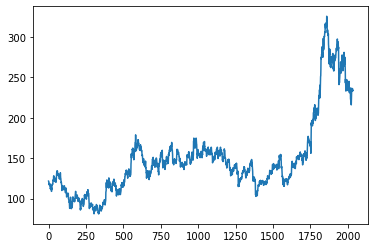

In [85]:
plt.plot(df['Close'])

In [86]:
df1 = df['Close']

In [87]:
#LSTM are sensitive to scale the data theefore applying MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [88]:
##Splitting dataset into train and test split
train_size = len(df1) * 0.8
test_size = len(df1) - train_size
train_data,test_data=df1[0:int(train_size),:],df1[int(train_size):len(df1),:1]

In [89]:
train_size, test_size

(1628.0, 407.0)

In [90]:
#Converting array of values into datasets
def create_dataset(dataset,time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [91]:
#reshape in X= t,t+1,t+2,t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [92]:
print(X_train.shape)
print(y_train.shape)

(1527, 100)
(1527,)


In [93]:
#reshaping the data for the LSTM model .reshape(samples, time_steps, features)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [94]:
##Creating Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [95]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 43s 626ms/step - loss: 0.0112 - val_loss: 0.0338
Epoch 2/100
24/24 [==============================] - 7s 303ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 3/100
24/24 [==============================] - 7s 295ms/step - loss: 8.3251e-04 - val_loss: 0.0064
Epoch 4/100
24/24 [==============================] - 7s 307ms/step - loss: 8.5926e-04 - val_loss: 0.0057
Epoch 5/100
24/24 [==============================] - 7s 292ms/step - loss: 7.6240e-04 - val_loss: 0.0080
Epoch 6/100
24/24 [==============================] - 7s 286ms/step - loss: 8.7203e-04 - val_loss: 0.0059
Epoch 7/100
24/24 [==============================] - 7s 290ms/step - loss: 7.0295e-04 - val_loss: 0.0060
Epoch 8/100
24/24 [==============================] - 8s 320ms/step - loss: 6.4802e-04 - val_loss: 0.0030
Epoch 9/100
24/24 [==============================] - 8s 339ms/step - loss: 6.6051e-04 - val_loss: 0.0059
Epoch 10/100
24/24 [==============================] - 7s 305ms

Epoch 78/100
24/24 [==============================] - 10s 420ms/step - loss: 1.2448e-04 - val_loss: 0.0016
Epoch 79/100
24/24 [==============================] - 15s 628ms/step - loss: 1.3139e-04 - val_loss: 0.0015
Epoch 80/100
24/24 [==============================] - 19s 799ms/step - loss: 1.4354e-04 - val_loss: 0.0022
Epoch 81/100
24/24 [==============================] - 20s 855ms/step - loss: 1.2625e-04 - val_loss: 0.0016
Epoch 82/100
24/24 [==============================] - 17s 705ms/step - loss: 1.2852e-04 - val_loss: 0.0025
Epoch 83/100
24/24 [==============================] - 11s 471ms/step - loss: 1.2328e-04 - val_loss: 0.0027
Epoch 84/100
24/24 [==============================] - 13s 534ms/step - loss: 1.2809e-04 - val_loss: 0.0024
Epoch 85/100
24/24 [==============================] - 28s 1s/step - loss: 1.2393e-04 - val_loss: 0.0037
Epoch 86/100
24/24 [==============================] - 12s 504ms/step - loss: 1.3947e-04 - val_loss: 0.0027
Epoch 87/100
24/24 [====================

In [98]:
import tensorflow as tf 

In [99]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [100]:
#converting back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [102]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

133.7253061107859

In [103]:
math.sqrt(mean_squared_error(y_test, test_predict))

241.20530717721493

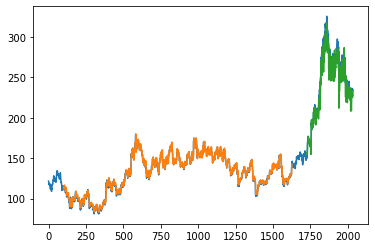

In [104]:
#Shifiting train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back :len(train_predict)+ look_back,:] = train_predict

#shifting test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back * 2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [105]:
len(test_data)

407

In [107]:
x_input = test_data[307:].reshape(1,-1)
x_input.shape

(1, 100)

In [108]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [109]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [111]:
#demonstrate prediction for the next 30 days
from numpy import array
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input, verbose = 0)
        print('{} day output {}'.format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1
        
print(lst_output)

[0.6029149]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

9 day output [[0.4376168]]
10 day input [0.67892157 0.69138072 0.70894608 0.72263072 0.73406863 0.72120098
 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203 0.75490196
 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582
 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183
 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915
 0.81719771 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667
 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935
 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758
 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948
 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098
 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745
 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974
 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464
 0.55167484 0.57883987 0.625      0.63582516 0.62949346 0.62888072
 0.62765523 0.62234477 

17 day output [[0.40665758]]
18 day input [0.74468954 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392
 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765
 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791
 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333
 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523
 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951
 0.66319444 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098
 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013
 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882
 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634
 0.62254902 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908
 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987
 0.625      0.63582516 0.62949346 0.62888072 0.62765523 0.62234477
 0.63378268 0.62622549 0.62214052 0.62418301 0.60291493 0.56483036
 0.52876467 0.50288296

25 day output [[0.38326955]]
26 day input [0.77062908 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562
 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902
 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869
 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902
 0.68198529 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935
 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444
 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464
 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163
 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098
 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392
 0.58006536 0.57618464 0.55167484 0.57883987 0.625      0.63582516
 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549
 0.62214052 0.62418301 0.60291493 0.56483036 0.52876467 0.50288296
 0.48520598 0.47184443 0.46076313 0.45145303 0.44381073 0.4376168
 0.43251997 0.42815924

In [113]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [114]:
len(df1)

2035

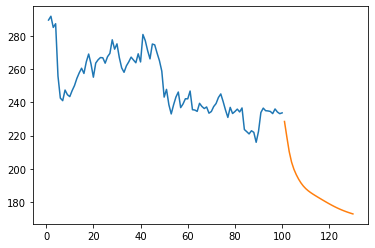

In [115]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

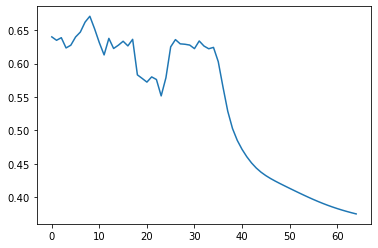

In [116]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [117]:
df3 = scaler.inverse_transform(df3).tolist()

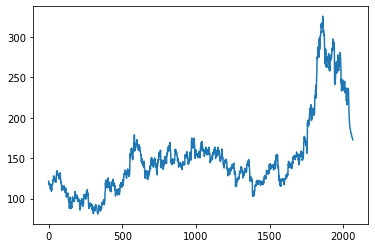

In [118]:
plt.plot(df3)